In [1]:
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [2]:
y_target = df['default']
X_features = df.drop('default', axis=1)

In [3]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

#### lightGBM을 사용하여 교차검증 및 평균 정확도 측정

In [4]:
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8071 0.8183 0.8213]
평균 검증 정확도: 0.8156


#### n_components=2인 pca로 차원 축소

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df)
df_pca = pca.transform(df)
print(df_pca.shape)

(30000, 2)


In [6]:
pca_columns=['pca_component_1','pca_component_2']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)
DF_pca.head(5)

,pca_component_1,pca_component_2
0,-166488.191086,-75538.153664
1,-114226.976817,9780.671250
2,-98432.362180,-33471.387330
3,-71230.675903,-95224.273104
4,-114834.618365,-68729.185233


#### 산점도로 데이터 시각화

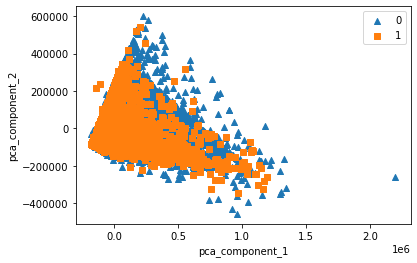

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

DF_pca['default']=df.default

markers=['^', 's']

for i, marker in enumerate(markers):
    x_axis_data = DF_pca[DF_pca['default']==i]['pca_component_1']
    y_axis_data = DF_pca[DF_pca['default']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=i)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()


In [10]:
y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7721 0.7677 0.7734]
평균 검증 정확도: 0.7711


#### 최적의 n_components 찾기

In [12]:
pca = PCA(n_components=3)

pca.fit(df)
df_pca = pca.transform(df)
print(df_pca.shape)

(30000, 3)


In [13]:
pca_columns=['pca_component_1','pca_component_2', 'pca_component_3']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)
DF_pca.head(5)

,pca_component_1,pca_component_2,pca_component_3
0,-166488.191086,-75538.153664,-472.952105
1,-114226.976817,9780.671250,2734.447477
2,-98432.362180,-33471.387330,-2678.469791
3,-71230.675903,-95224.273104,-10047.716972
4,-114834.618365,-68729.185233,24604.948085


In [16]:
DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7654 0.7718 0.7754]
평균 검증 정확도: 0.7709


In [17]:
pca = PCA(n_components=4)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.764  0.7702 0.7752]
평균 검증 정확도: 0.7698


In [18]:
pca = PCA(n_components=5)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7697 0.7735 0.7766]
평균 검증 정확도: 0.7733


In [19]:
pca = PCA(n_components=6)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7722 0.7799 0.7793]
평균 검증 정확도: 0.7771


In [20]:
pca = PCA(n_components=7)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.775  0.7782 0.7801]
평균 검증 정확도: 0.7778


In [21]:
pca = PCA(n_components=8)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7764 0.7801 0.7851]
평균 검증 정확도: 0.7805


In [22]:
pca = PCA(n_components=9)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7774 0.7802 0.7832]
평균 검증 정확도: 0.7803


In [23]:
pca = PCA(n_components=10)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7773 0.7792 0.7814]
평균 검증 정확도: 0.7793


In [24]:
pca = PCA(n_components=11)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7748 0.7804 0.7839]
평균 검증 정확도: 0.7797


In [25]:
pca = PCA(n_components=12)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7771 0.7816 0.7864]
평균 검증 정확도: 0.7817


In [26]:
pca = PCA(n_components=13)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7778 0.7822 0.7822]
평균 검증 정확도: 0.7807


In [27]:
pca = PCA(n_components=14)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7791 0.7817 0.7841]
평균 검증 정확도: 0.7816


In [28]:
pca = PCA(n_components=15)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7926 0.7964 0.8002]
평균 검증 정확도: 0.7964


In [29]:
pca = PCA(n_components=16)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8375 0.8448 0.8506]
평균 검증 정확도: 0.8443


In [30]:
pca = PCA(n_components=17)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16','17']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.841  0.8513 0.8589]
평균 검증 정확도: 0.8504


In [31]:
pca = PCA(n_components=18)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16','17', '18']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8507 0.8637 0.8622]
평균 검증 정확도: 0.8589


In [34]:
pca = PCA(n_components=19)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16','17', '18', '19']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8688 0.8777 0.881 ]
평균 검증 정확도: 0.8758


In [35]:
pca = PCA(n_components=20)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16','17', '18', '19', '20']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8715 0.8818 0.8844]
평균 검증 정확도: 0.8792


In [36]:
pca = PCA(n_components=21)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16','17', '18', '19', '20', '21']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

scores = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8684 0.88   0.8813]
평균 검증 정확도: 0.8766


가장 평균 정확도가 높은 경우 : n=20

원본 데이터와의 평균 정확도 차이 : 0.0636

<AxesSubplot:>

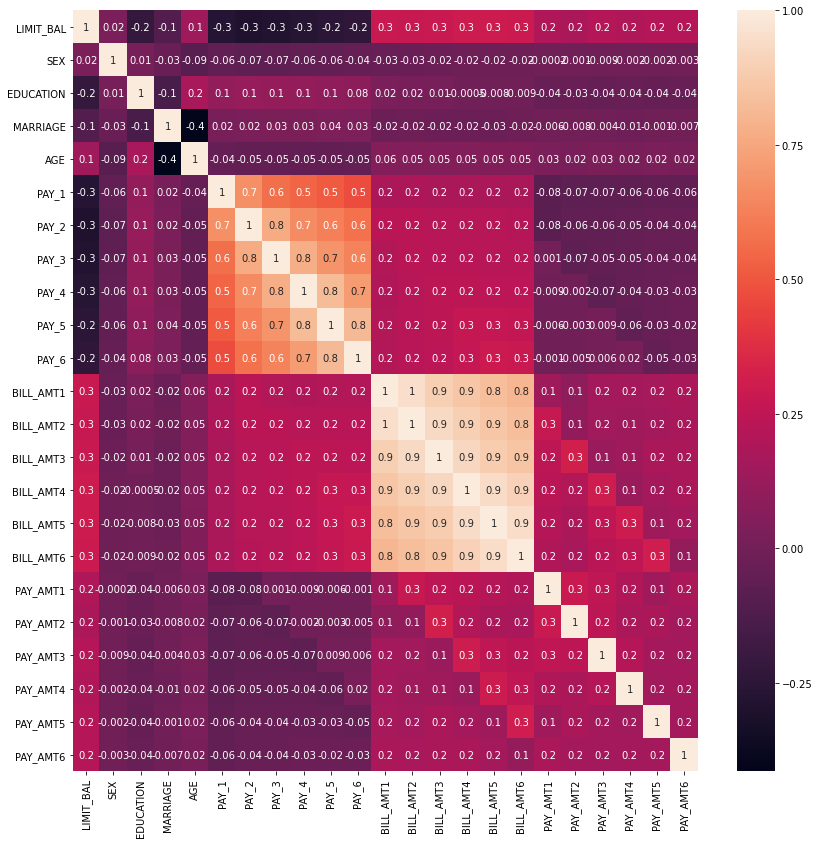

In [39]:
import seaborn as sns

X_features = df.drop('default', axis=1)
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

bill_amt1\~bill_amt6의 상관도가 매우 높으며, pay_1\~pay_6까지의 상관도 역시 상당히 높다.
즉, 각 column들 사이의 상관도가 높은편이기 때문에, PCA를 통해 차원 축소를 하더라도 좋은 성능을 보일 수 있는 것 같다.